<a href="https://colab.research.google.com/github/MUHAMMADFAWWAZWIYOGA/DIF2130_A_25_2311532019/blob/main/Pratikum1/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LINEAR REGRESSION***

# **IMPORT LIBRARIES YANG DIPERLUKAN**



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import joblib
import pickle
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler




# ***CLIFORNIA HOUSING DAN PREDIKSI***

- dataset digunakan adalah fect_california_housing, dataset ini di simpann dalam variabel housing
- untuk melihat data set digunakan. penggunaan perintah `DataFrame` yang mana pemanggilan ini mulai dari data pada housing dan masing masing features pada tabel housing yang dijadikan kolom )
- ditambahkan kolom med_house_val dengan nilai didalam berupa median rumah dalam ratusan USD

untuk melakukan prediksi med_house_val dijadikan target kolom dan seluruh fitur lainnya dijadikan input pada model machine learning


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df =pd.DataFrame ( data= housing.data, columns=housing.feature_names)
df['med_house_val'] = housing.target

target=df['med_house_val']
input=df.drop(['med_house_val'], axis=1)
df.tail(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,med_house_val
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


# **PENGECEKAN  DATASET**

perintah
- `describe` merupakan pemanggilan dari ringkasan statistik pada kolom numerik pada dataframe
- `info` merupakan pemanggilaan dari masing masing kolom dataset serta di lampirkan tipe data dari kolom
- dan terkahir dimensi dari dataset di panggil dengan perintah `shape`

In [3]:
df.describe()
df.info()
print ('DataFrame dimension',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   med_house_val  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
DataFrame dimension (20640, 9)


# **DATA PREPOCESSING**

 dataset dibagi menjadi 70% training dan 30% test

 penggunan `X_train,X_test,y_train,y_test = train_test_split(input, target, test_size=0.3, random_state = 1)` adalah fungsi dari model sklearn.model_selection, yang akan membagi dataset menjadi 70% training dan 30 % test  

- Training set (X_train, y_train) → digunakan untuk melatih model.
- Testing set (X_test, y_test) → digunakan untuk menguji model setelah dilatih.

`train_test_split(input, target, test_size=0.3, random_state = 1)`
- input adalah fitur atau independce variabel yang digunakan pada model, pada kasus ini input dimasukan semua kecuali dari med_house_val
- target adalah depedent label yaitu kolom med_house_val yang berisi harga median dalam satuan ribuan dolar
- test_size = 0,3 menentukan persentase yang digunakan untuk pengujian (test set), hal ini menandakan 30% dari dataset akan dijadikan data pengujian ( X_test, y_test), dan sisa dijadikan pelaithan (70%) yaitu x_train, dan y_train
- random state = 1 , merupakan pengecakan /shuffle pada data sebelum pembagian . disin irandom state 1 akan berperan sebgai dataset akan dibagi secara acak berbeda setiap kode dijalankan

sehingga dengan output tersebut training shape memiliki 14448 baris dan 8 kolom begitu juga y train yang berukan rasama berbeda dengan test yang sebelum adalah 30% maka baris nya adalah 6292



In [4]:
X_train,X_test,y_train,y_test = train_test_split(input, target, test_size=0.3, random_state = 1)
print(X_train.shape, X_train.shape)
print(y_train.shape, y_test.shape)

(14448, 8) (14448, 8)
(14448,) (6192,)


# **NORMALISASI DATA**

normalisasi data digunakan untuk mengubah skala fitur dalam dataset menjadi rentang tertentu ( default 0 hingga 1 )
dengan tujuan
- memastikan semua data dalam skala yang sama
- menghindari dominasi tertentu yang memiliki nilai lebih besar dalam fitur tertentu
- meningkatkan peforma model , karena algoritma linear regressi lebih sensitif terhadap skala data

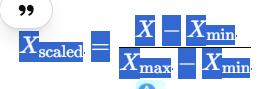


- scaler = MinMaxScaler()
ini dibuat sebagai objek yang digunakan untuk normalisasi , secara default digunakan rentang 0,1. dan jika ingin mengubah rentang dapat dilakukan penambahan perintah

- X_train = scaler.fit_transform(X_train)
fit.transform menggunakan 2 langkah utama fit train menhitung nilai dari min dan max data training, dan transform (X_train) menggunakan nilai xmin dan x_max untuk normalisasi pada setiap data

- X_test = scaler.transform(X_test)
digunakan transfomr (X_test), untuk tidak menhitung ulang dari nilai min dan mx data testing, karena data testing menerapkan skala sehingga test hanya menerapkan skala sama ke X_test

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print (X_test)

[[1.89659453e-01 7.45098039e-01 2.59249620e-02 ... 8.26699958e-04
  1.61530287e-01 5.94594595e-01]
 [1.01964111e-01 7.05882353e-01 2.93658328e-02 ... 1.49655077e-03
  4.50584485e-01 4.52452452e-01]
 [2.42293210e-01 8.82352941e-01 2.57625553e-02 ... 2.43712035e-03
  5.51540914e-01 1.88188188e-01]
 ...
 [1.43901463e-01 9.01960784e-01 2.71911561e-02 ... 1.63065424e-03
  5.92986185e-01 2.05205205e-01]
 [1.45508338e-01 2.35294118e-01 2.97484189e-02 ... 1.59782455e-03
  5.87672689e-01 2.06206206e-01]
 [8.33367816e-02 5.49019608e-01 1.45501245e-02 ... 1.74904890e-03
  1.65781084e-01 6.00600601e-01]]


# **MELATIH MODEL REGRESI**

kode ini melatih dari model regressi dari sklearn menggunaakn dataset sebelumnya, dengan tujuan mencari hubungan antara X_train dan y_train sehingga menghasilkan garis persamaan regressi

objek model di deklarasikan dengan bentuk lr_model, sehingga objek model ini dilatih dengan X_train dan Y_train sebelumnya

In [6]:
from sklearn.linear_model import LinearRegression
lr_model =LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

# **PREDIKSI**

sehingga dengan model prediksi diatas dapat dihasilkan mulai dari intercept dan slope pada x train dan y train

In [7]:
print (f'intercept: {lr_model.intercept_}')
print (f'slope: {lr_model.coef_}')

intercept: 3.721516132506502
slope: [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


# **MSE (Mean Squared Error)**

MSE adalah rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi
pada kali ini evaluasi dari model menggunakan mse

- pertama y_pred merupakan model prediksi pada X_test sebelumnya
- dan pada mse ini digunakan rata rata kesalahan kuadrat anatara nilai aktual dan prediksi
- dengan kondisi, dimana semakin kecil nilai dari mse maka model lebih baik karena eror lebih kecil begitu juga sebaliknya dimana semakin besar mse makan model semakin buruk
- R ( kuadrat ) digunakan untuk mengukur seberaoa baik model menjelaskan dalam variasi data

dengan Interpretasi R² Score:

- Nilai R² = 1 → Model sempurna (prediksi 100% akurat).
- Nilai R² mendekati 1 → Model bagus (prediksi cukup akurat).
- Nilai R² mendekati 0 → Model kurang bagus (prediksi tidak jauh lebih baik dari rata-rata).
- Nilai R² negatif → Model sangat buruk, bahkan lebih buruk dari sekadar menebak rata-rata

In [8]:
from sklearn.metrics import mean_squared_error
y_pred = lr_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=lr_model.score(X_test,y_test)
print ( f'mse:{mse}')
print (f'R2 :{r2}')

mse:0.5296293151408232
R2 :0.597142973735963


# **VISUALISASI DATA**

langkah terakhir dimana visualisasi dari data sudah di latih
- visualisasi digunakan adalah scatter plot dan x label berupa actual values dan y label adalah prediksi values. dan judul dari visualisasi ini merupakan aktual vs prediksi nilai

**observasi plot**
1. pola sebaran
- titik cukup tersebar banyak di kanan
- ini menunjukan variasi besar pada aktual dan prediksi
2. pola regressi
- jika regressi baik maka titik akan cenderung digaris diagonal
- dalam plot ini ditunjukan data banyak menjauh yang berarti model mungkin kurang akurat
3. kesalah model
- dengan banyak titik yang jauh dari nilai aktual maka mengindikasikan bahwa model memiliki eror yang cukup banyak


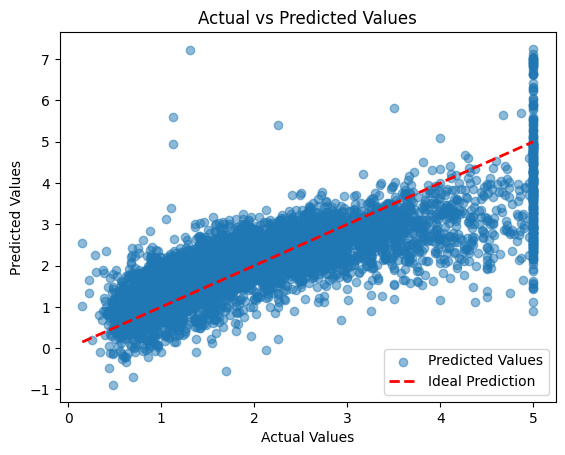

In [9]:
import numpy as np
plt.scatter(y_test, y_pred, label='Predicted Values', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


PENYIMPANAN FILE DENGAN FORMAT SAV & PICKLE DUMP MENYIMPAN OBJEK KEDALAM FILE

In [10]:
import pickle

filename = 'Finalized_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))